# **Market Basket Analysis by applying 'Ap priori Rules'**

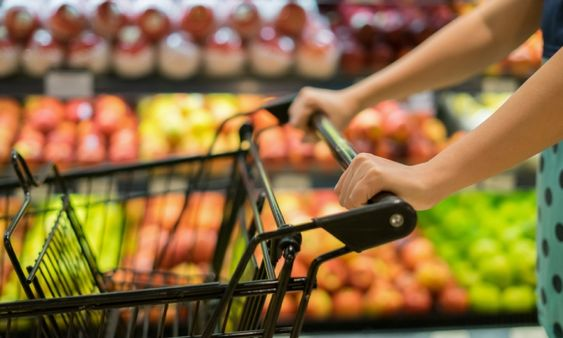

### Case Scenario
Assume your marketing team is going to come out with the bundle promotion. Thus, you want to know which item is frequently bought with another item. Finally, you hope to get a list of groups of item sets sorted based on the highest occurrence in descending and help you to push the bundle promotion successfully. To achieve the goal, you are responsible for discovering the pattern in transactions based on the dataset below by ap priori rules.

#### Dataset ⏬⏬⏬
You may download the dataset via the _[link](https://www.kaggle.com/datasets/shazadudwadia/supermarket)_ .

### Key Findings 💡
According to the table of 'Filtered Result', I only take the results that support is greater or equal to 0.2, confidence is more than 0.8, and whose lift is more than 1. Thus, two results that matched the criteria set are shown below:
1. **(MAGGI) -> (TEA)**:
The support is 0.2, meaning that 20% of transactions contain the Maggi and tea. The confidence is 0.8, meaning that 80% of the time, the user who bought Maggi will also buy tea. Last, the lift is 2.2857, indicating a strong and positive correlation between Maggi and tea when using Maggi as a predictor to predict the chance of buying tea. Buying Maggi increases the likelihood of purchasing tea by 128% compared to random chance.
   
2. **(MILK) -> (BREAD)**:
The support is 0.2, meaning that 20% of transactions contain the milk and bread. The confidence is 0.8, meaning that 80% of the time, the user who bought milk will also buy bread. Last, the lift is 1.2308, indicating a strong and positive correlation between milk and bread when using milk as a predictor to predict the chance of buying bread. Buying milk increases the likelihood of purchasing bread by 23% compared to random chance.

### Suggestion 🛒
- If the marketing teams want to promote the bundle sales, they can choose either the combination of Maggi and Tea, or the combination of Milk and Bread.
- A marketing strategy applied for jam or cock is recommended to boost the respective sales, as the chance of buying jam and cock is low compared to other items based on the frequency table or frequent itemset table.

### Limitation 🫠
- The dataset only contains 20 rows, which is considered a small dataset. To enhance this, you are recommended to use the larger dataset to investigate the pattern and better understand the customer buying behavior, as the more data you utilize, the better understanding you get. If the dataset contains more than a million rows, ap priori is not recommended to apply as it is more suitable for small datasets, whereas, the advanced version of the ap priori rule, called _**"FP growth"**_, is recommended to use instead.

# Import Dataset

In [3]:
import pandas as pd

# URL of the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/marcus-0413/Market-Basket/refs/heads/main/GroceryStoreDataSet.csv'

# Define the column name 
col = ['item set']

# Load the CSV into a pandas DataFrame
df = pd.read_csv(url, header=None, names=col)

# Display the first few rows
df.head()

,item set
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [4]:
# Check the dataset size 
print('Number of row :', df.shape[0])
print('Number of column :', df.shape[1])

Number of row : 20
Number of column : 1


**Remark:** The dataset contains 20 rows and 1 column.

# Data pre-processing 
Before applying the ap priori rule, I'm going to change the dataset format into the desirable format as below for better applying ap priori rule later.

### Example format
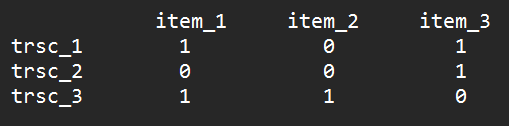

**For Your Infomation:**  
1: Represent the transaction containing the item;  
0: Represent the transaction not containing the item.

In [7]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# plit the items in each transaction into lists
df['item set'] = df['item set'].apply(lambda x: x.split(',')) 
# Reason for using lambda function instead of df['item set].str.split(',') is the latter solution might result in space after splitting the values, where it will affect the implementation of appriori rule 

# Apply Ap priori Rule 

In [9]:
# Convert the list of transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(df['item set']).transform(df['item set'])
df_transformed = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_transformed, min_support=0.1, use_colnames=True) #If the min support is too high, the result will not generate based on current dataset

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3) #If the threshold set is too high, the result will not generate on current dataset

# Display frequent itemsets and rules
print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", rules)

Frequent Itemsets:
     support                             itemsets
0      0.35                            (BISCUIT)
1      0.20                          (BOURNVITA)
2      0.65                              (BREAD)
3      0.15                               (COCK)
4      0.40                             (COFFEE)
5      0.30                         (CORNFLAKES)
6      0.10                                (JAM)
7      0.25                              (MAGGI)
8      0.25                               (MILK)
9      0.30                              (SUGER)
10     0.35                                (TEA)
11     0.20                     (BREAD, BISCUIT)
12     0.10                      (COCK, BISCUIT)
13     0.10                    (COFFEE, BISCUIT)
14     0.15                (CORNFLAKES, BISCUIT)
15     0.10                     (MAGGI, BISCUIT)
16     0.10                      (MILK, BISCUIT)
17     0.10                       (TEA, BISCUIT)
18     0.15                   (BREAD, BOURNVITA)


In [10]:
# Sort frequent itemsets by support in descending order
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)

# Display sorted frequent itemsets
print(frequent_itemsets_sorted)

# Sort association rules by confidence in descending order
rules_sorted = rules.sort_values(by='confidence', ascending=False)

# Display sorted rules
print(rules_sorted)

    support                             itemsets
2      0.65                              (BREAD)
4      0.40                             (COFFEE)
0      0.35                            (BISCUIT)
10     0.35                                (TEA)
5      0.30                         (CORNFLAKES)
9      0.30                              (SUGER)
7      0.25                              (MAGGI)
8      0.25                               (MILK)
30     0.20                      (SUGER, COFFEE)
34     0.20                         (TEA, MAGGI)
11     0.20                     (BREAD, BISCUIT)
29     0.20                 (COFFEE, CORNFLAKES)
26     0.20                         (TEA, BREAD)
25     0.20                       (SUGER, BREAD)
24     0.20                        (MILK, BREAD)
1      0.20                          (BOURNVITA)
21     0.15                      (COFFEE, BREAD)
27     0.15                       (COCK, COFFEE)
23     0.15                       (BREAD, MAGGI)
3      0.15         

# Filter Result 

In [12]:
rules_sorted[(rules_sorted['support'] >= 0.2) & (rules_sorted['lift'] > 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.750000,0.250000
34,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.250000,0.750000
26,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.800000,0.571429
25,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.800000,0.571429
16,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.050000,0.035714
33,(TEA),(MAGGI),0.35,0.25,0.2,0.571429,2.285714,0.1125,1.750000,0.865385
24,(COFFEE),(CORNFLAKES),0.40,0.30,0.2,0.500000,1.666667,0.0800,1.400000,0.666667
27,(COFFEE),(SUGER),0.40,0.30,0.2,0.500000,1.666667,0.0800,1.400000,0.666667
17,(BREAD),(SUGER),0.65,0.30,0.2,0.307692,1.025641,0.0050,1.011111,0.071429
15,(BREAD),(MILK),0.65,0.25,0.2,0.307692,1.230769,0.0375,1.083333,0.535714


# Find the Unique item

In [14]:
# Step 1: Flatten the list of lists into a single list
all_items = [item for sublist in df['item set'] for item in sublist]

# Step 2: Extract unique items using set() or pd.unique()
unique_items = set(all_items)

# Display the unique items
print("Unique Items:", unique_items)

Unique Items: {'TEA', 'CORNFLAKES', 'SUGER', 'COCK', 'COFFEE', 'BISCUIT', 'MILK', 'JAM', 'BREAD', 'MAGGI', 'BOURNVITA'}


In [15]:
from collections import Counter

# Step 1: Count frequencies of each item
item_frequency = Counter(all_items)

# Step 2: Convert the counter to a DataFrame for better readability
frequency_df = pd.DataFrame(item_frequency.items(), columns=['Item', 'Frequency'])

# Sort by Frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Display the frequency DataFrame without the index
print(frequency_df.to_string(index=False))

      Item  Frequency
     BREAD         13
    COFFEE          8
   BISCUIT          7
       TEA          7
CORNFLAKES          6
     SUGER          6
      MILK          5
     MAGGI          5
 BOURNVITA          4
      COCK          3
       JAM          2


# Heatmap

In [17]:
df_transformed

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


C:\Users\lic02\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\lic02\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\lic02\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


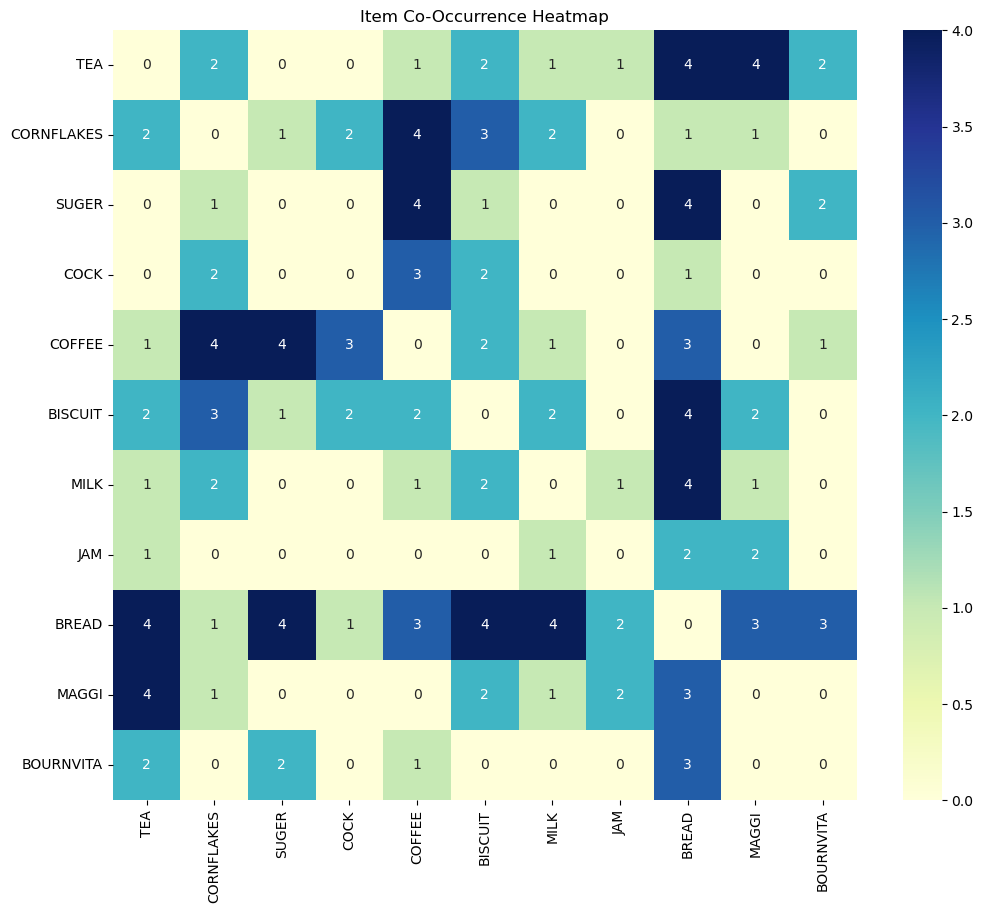

In [18]:
import pandas as pd
import numpy as np
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

items = list(set(item for sublist in df['item set'] for item in sublist))
co_occurrence_matrix = pd.DataFrame(0, index=items, columns=items)

for transaction in df['item set']:
    for item1, item2 in combinations(transaction, 2):
        co_occurrence_matrix.at[item1, item2] += 1
        co_occurrence_matrix.at[item2, item1] += 1  # Symmetric


plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Item Co-Occurrence Heatmap')
plt.show()

In [19]:
co_occurrence_matrix

,TEA,CORNFLAKES,SUGER,COCK,COFFEE,BISCUIT,MILK,JAM,BREAD,MAGGI,BOURNVITA
TEA,0,2,0,0,1,2,1,1,4,4,2
CORNFLAKES,2,0,1,2,4,3,2,0,1,1,0
SUGER,0,1,0,0,4,1,0,0,4,0,2
COCK,0,2,0,0,3,2,0,0,1,0,0
COFFEE,1,4,4,3,0,2,1,0,3,0,1
BISCUIT,2,3,1,2,2,0,2,0,4,2,0
MILK,1,2,0,0,1,2,0,1,4,1,0
JAM,1,0,0,0,0,0,1,0,2,2,0
BREAD,4,1,4,1,3,4,4,2,0,3,3
MAGGI,4,1,0,0,0,2,1,2,3,0,0
